In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(r"C:\Users\Soft\Desktop\Py\Docs\monthly_milk_production.csv", 
                 parse_dates=True, index_col="Date")

In [5]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Production  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [7]:
df.loc["1972"]

,Production
Date,
1972-01-01,826
1972-02-01,799
1972-03-01,890
1972-04-01,900
1972-05-01,961
1972-06-01,935
1972-07-01,894
1972-08-01,855
1972-09-01,809


In [8]:
df.loc["1972"].mean()

Production    854.166667
dtype: float64

In [9]:
avg_prod = [df.loc[f"{i}"].mean()[0] for i in range(1962, 1976)]

In [10]:
avg_prod

[615.75,
 630.0,
 658.75,
 673.0833333333334,
 708.75,
 732.9166666666666,
 748.8333333333334,
 763.9166666666666,
 782.0,
 834.0833333333334,
 854.1666666666666,
 842.5833333333334,
 858.4166666666666,
 862.6666666666666]

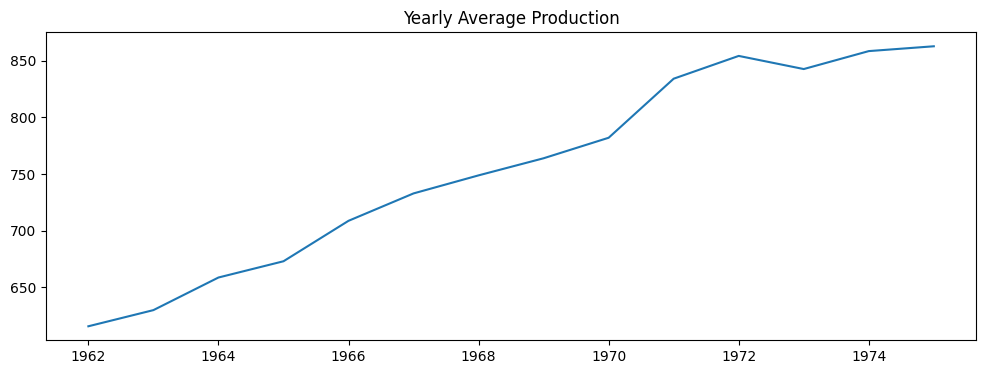

In [12]:
plt.figure(figsize=(12, 4))
plt.plot(range(1962, 1976), avg_prod)
plt.title("Yearly Average Production")
plt.show()

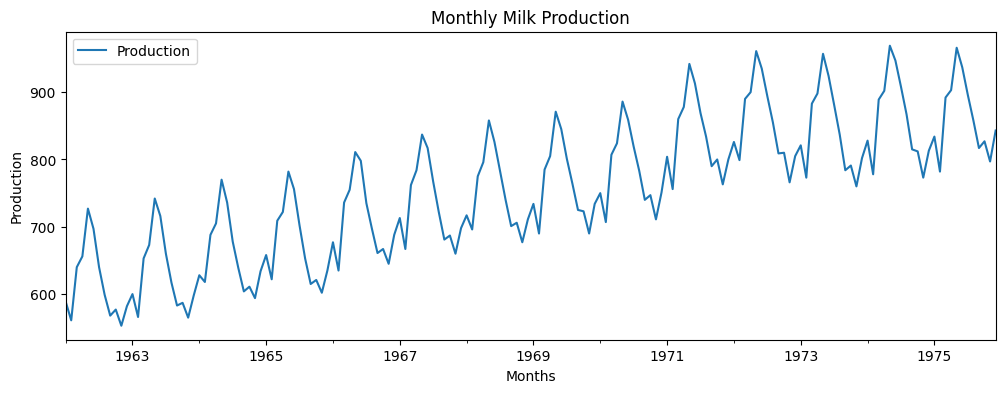

In [17]:
df.plot(figsize=(12, 4), xlabel="Months", ylabel="Production", title="Monthly Milk Production")
plt.show()

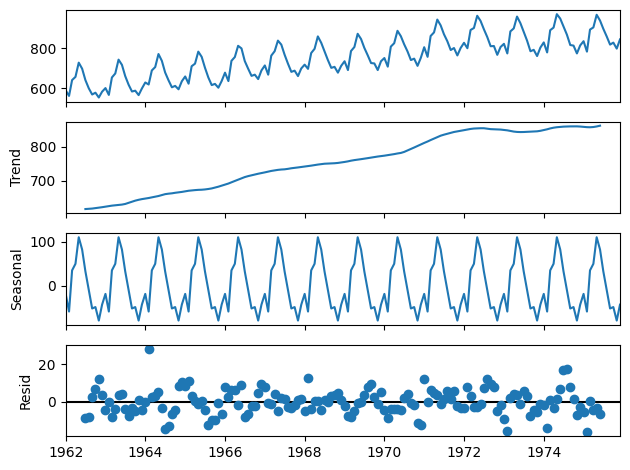

In [19]:
seasonal_decompose(df).plot();

In [20]:
len(df)

168

In [21]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [22]:
train

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1974-08-01,867
1974-09-01,815
1974-10-01,812


In [23]:
test

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817


In [24]:
train.min()

Production    553
dtype: int64

In [25]:
train.max()

Production    969
dtype: int64

In [26]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [27]:
scale_train = scaler.transform(train)
scale_test = scaler.transform(test)

In [28]:
scale_train

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154],
       [0.11298077],
       [0.03125   ],
       [0.24038462],
       [0.28846154],
       [0.45432692],
       [0.39182692],
       [0.25721154],
       [0.15384615],
       [0.07211538],
       [0.08173077],
       [0.02884615],
       [0.10817308],
       [0.18028846],
       [0.15625   ],
       [0.32451923],
       [0.36538462],
       [0.52163462],
       [0.43990385],
       [0.30048077],
       [0.20673077],
       [0.12259615],
       [0.13942308],
       [0.09855769],
       [0.19471154],
       [0.25240385],
       [0.16586538],
       [0.375     ],
       [0.40625   ],
       [0.55048077],
       [0.48798077],
       [0.35817308],
       [0.24038462],
       [0.14903846],
       [0.16346154],
       [0.11778846],
       [0.197

In [29]:
generator = TimeseriesGenerator(scale_train, scale_train, length=12, batch_size=1)

In [34]:
generator[2]

(array([[[0.20913462],
         [0.24759615],
         [0.41826923],
         [0.34615385],
         [0.20913462],
         [0.11057692],
         [0.03605769],
         [0.05769231],
         [0.        ],
         [0.06971154],
         [0.11298077],
         [0.03125   ]]]),
 array([[0.24038462]]))

In [35]:
a, b = generator[0]
a.shape, b.shape

((1, 12, 1), (1, 1))

In [41]:
model = Sequential([
    LSTM(2000, activation="relu", input_shape=((12, 1))),
    Dense(1)
])

In [42]:
model.compile(optimizer="adam", loss="mse")

In [43]:
model.fit(generator, epochs=30)

Epoch 1/30
144/144 [==============================] - 53s 362ms/step - loss: 0.0580
Epoch 2/30
144/144 [==============================] - 57s 394ms/step - loss: 0.0154
Epoch 3/30
144/144 [==============================] - 54s 373ms/step - loss: 0.0083
Epoch 4/30
144/144 [==============================] - 53s 369ms/step - loss: 0.0050
Epoch 5/30
144/144 [==============================] - 54s 377ms/step - loss: 0.0036
Epoch 6/30
144/144 [==============================] - 53s 367ms/step - loss: 0.0030
Epoch 7/30
144/144 [==============================] - 55s 381ms/step - loss: 0.0031
Epoch 8/30
144/144 [==============================] - 53s 369ms/step - loss: 0.0030
Epoch 9/30
144/144 [==============================] - 53s 372ms/step - loss: 0.0053
Epoch 10/30
144/144 [==============================] - 57s 395ms/step - loss: 0.0025
Epoch 11/30
144/144 [==============================] - 53s 369ms/step - loss: 0.0030
Epoch 12/30
144/144 [==============================] - 54s 378ms/step - lo

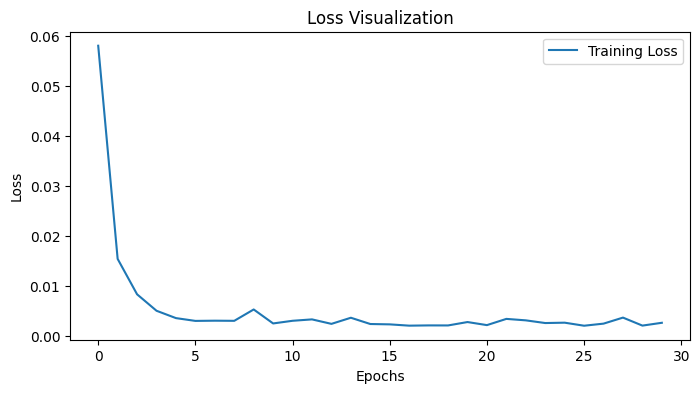

In [44]:
plt.figure(figsize=(8, 4))
plt.plot(model.history.history["loss"], label="Training Loss")
plt.legend()
plt.title("Loss Visualization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [45]:
last_train_batch = scale_train[-12:].reshape((1, 12, 1))

In [46]:
model.predict(last_train_batch)[0]

1/1 [==============================] - 0s 381ms/step


array([[0.6934462]], dtype=float32)

In [47]:
scale_test[0]

array([0.67548077])

In [48]:
test_pred = []
first_eval_batch = scale_train[-12:]
current_batch = first_eval_batch.reshape((1, 12, 1))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_pred.append(current_pred)

    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

1/1 [==============================] - 0s 79ms/step


In [49]:
test_pred

[array([0.6934462], dtype=float32),
 array([0.6110999], dtype=float32),
 array([0.8252663], dtype=float32),
 array([0.8731167], dtype=float32),
 array([1.0104057], dtype=float32),
 array([0.97575694], dtype=float32),
 array([0.89480805], dtype=float32),
 array([0.8013888], dtype=float32),
 array([0.68696326], dtype=float32),
 array([0.66586363], dtype=float32),
 array([0.5887949], dtype=float32),
 array([0.66164535], dtype=float32)]

In [50]:
actual_pred = scaler.inverse_transform(test_pred)

In [51]:
test

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817


In [52]:
test["Predictions"] = actual_pred

In [53]:
test

,Production,Predictions
Date,,
1975-01-01,834,841.473627
1975-02-01,782,807.217558
1975-03-01,892,896.310781
1975-04-01,903,916.216536
1975-05-01,966,973.328754
1975-06-01,937,958.914888
1975-07-01,896,925.240150
1975-08-01,858,886.377741
1975-09-01,817,838.776716


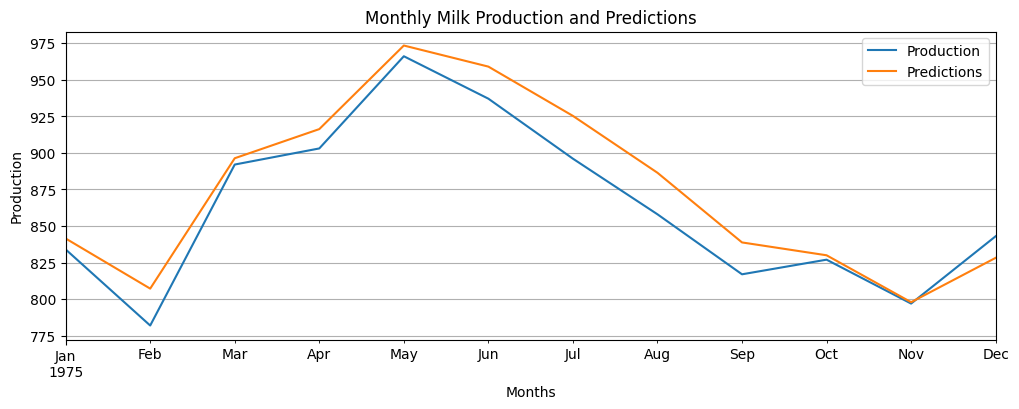

In [56]:
test.plot(figsize=(12, 4), title="Monthly Milk Production and Predictions",
         xlabel="Months", ylabel="Production", grid=True)
plt.show()

In [60]:
rmse = np.sqrt(mean_squared_error(test["Production"], test["Predictions"]))
rmse

17.750876488653503

In [61]:
test["Production"].mean()

862.6666666666666

In [62]:
lower = test["Production"].mean() - rmse
upper = test["Production"].mean() + rmse

In [63]:
lower, upper

(844.9157901780131, 880.4175431553201)

In [64]:
test.Predictions.mean()

875.0032636324564

In [67]:
r2 = r2_score(test["Production"], test["Predictions"])
r2

0.8926081629508308

In [70]:
adj_r2 = 1 - (((1-r2)*(len(test)-1))/(len(test)-1-1))
adj_r2

0.8818689792459139